In [1]:
# 导入必要的函数库
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import serial
import time

In [2]:
# 打开摄像机和端口，不轻易运行
capture=cv2.VideoCapture(1)
_,image=capture.read()
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# ser.close()
ser = serial.Serial('COM10', 115200)

In [136]:
# 定义字符串的转换方式
# 先定义最大速度
max_speed=10
def convert_to_two_digits(number):
    if 10 > number >= 0:
        return '+0' + str(number)
    if 100 > number >= 10:
        return '+' + str(min(number,max_speed))
    if 0 > number > -10:
        return '-0' + str(number)[1]
    if -10 >= number > -100:
        return '-'+str(min(abs(number),max_speed))
# 在整个图片中获取红色点
# 在整个image所获取的图片中[:,:,1]是绿色图片,[:,:,2]是红色图片
def get_red_point(capture, red_center):
    _,image=capture.read()
    # 找到红色的点
    image_red_true=image[:,:,1].astype(np.float32)
    image_back=(image[:,:,2].astype(np.float32)+image[:,:,0].astype(np.float32))/2
    image_back=image_back.astype(np.float32)
    image_red=np.abs(image_red_true-image_back)
    # image_red=image[:,:,1]
    image_red=image_red.astype(np.uint8)
    red = np.array(np.argwhere(image_red>70))
    # 红色中心点坐标
    if red.shape[0]>2:
        red_center=np.ones(2)
        red_center[0]=int(np.sum(red[:,0])/(np.size(red[:,0])+0.001))
        red_center[1]=int(np.sum(red[:,1])/(np.size(red[:,0])+0.001))
    else:
        pass
    return(red_center)
# 将红点移动到目标点
def move_to_the_point(dis_aim,speed,aim_center,sleep_time,red_center):
    dis_center=12
    speed=speed/10
    # while True:
    while dis_center>dis_aim:
        get_red_point(capture, red_center)
        dis_center=np.linalg.norm(aim_center-red_center)
        rotate=(aim_center-red_center)*speed
        rotate=-rotate
        # 第1个数正上负下  第2个数，正左负右
        data = convert_to_two_digits(int(rotate[0]))+convert_to_two_digits(int(rotate[1]))
        encoded_data = data.encode()
        ser.write(encoded_data)
        time.sleep(sleep_time)
# 蜂鸣器响3秒
def buzzer_open():
    data = "ffffff"
    encoded_data = data.encode()
    ser.write(encoded_data)

In [134]:
# ser.close()
# ser = serial.Serial('COM10', 115200)
# 第1个数正上负下
rotate=np.ones(2)
rotate[0]=5
# 第2个数，正左负右
rotate[1]=0
data = convert_to_two_digits(int(rotate[0]))+convert_to_two_digits(int(rotate[1]))
encoded_data = data.encode()
ser.write(encoded_data)

6

In [137]:
# 定义卷积核
kernel = np.array([
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0],
[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
[0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
])*0.01
a=11
b=11

In [138]:
''' 以下是静态工作区-----------------------------------------------------------------------------------'''
# 首先要获取路径的边界
# 对于获取的路径边界，我们将路径边框的四个点都获取出来，之后，将外围的环境都设为0
# 然后对于所获取的点，我们再将我们的路径给规划出来
border_point=np.ones((4,2))
red_center=np.ones(2)
red_center[0]=240
red_center[1]=320
while True:
    change=int(input('whether to change the point ,Yes input 1 ,No input 0'))
    if change==0:
        break
    if change==1:
        i=int(input('which point you like to change? No 1~4'))-1
        while True:
            OK=0
            # 分别读取4个边界点的坐标
            while OK==0:
                _,image=capture.read()
                # 对于所获得的图像，首先计算他的几何中心
                # 先转为灰度图
                gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                # edges_show=cv2.Canny(gray, 240, 200)
                edges_show=gray
                # 获取边界
                red_center=get_red_point(capture,red_center)
                if (int(red_center[0]-a)>0)&(int(red_center[0]+b)<480)&(int(red_center[1]-a)>0)&(int(red_center[1]+b)<640):
                    edges_show[int(red_center[0]-a):int(red_center[0]+b),int(red_center[1]-a):int(red_center[1]+b)]=kernel*25400
                else:
                    edges_show[240-a:240+b,320-a:320+b]=kernel*25400
                cv2.imshow('edges_show', edges_show)
                cv2.waitKey(1)
                OK=int(input(f"point {i+1} OK? if OK input 1,not ok input 0"))
                if OK==1:
                    border_point[i,:]=red_center
            break
# 首先计算整个图形的中心点
circle_center=np.ones(2)
circle_center[0]=int(np.sum(border_point[:,0])/(np.size(border_point[:,0])+0.001))
circle_center[1]=int(np.sum(border_point[:,1])/(np.size(border_point[:,1])+0.001))

ValueError: invalid literal for int() with base 10: ''

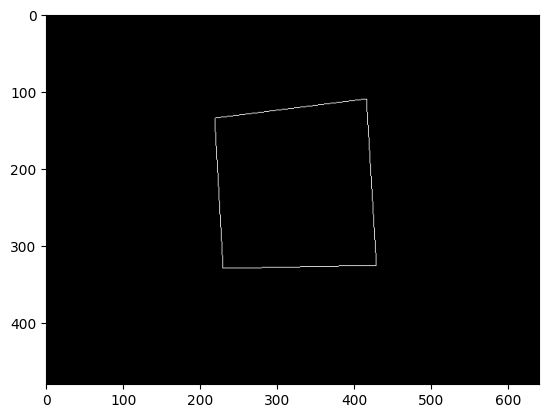

In [16]:
# 在获取4个中心点过后，我们去计算他们的路径
# 首先原图像上将完整的图形绘制出来
image_center=np.zeros(np.shape(gray))
for i in [0,2]:#计算每条直线的解析式，同时将上面点标为255，其余的点标为0
    k_line=(border_point[i,0]-border_point[(i+1)%4,0])/(border_point[i,1]-border_point[(i+1)%4,1]+0.001)
    b_line=border_point[i,0]-k_line*border_point[i,1]
    for x in range(int(min(border_point[i,1],border_point[(i+1)%4,1])),int(max(border_point[i,1],border_point[(i+1)%4,1]))):
        y=int(k_line*x+b_line)
        image_center[y,x]=255
for i in [1,3]:#计算每条直线的解析式，同时将上面点标为255，其余的点标为0
    k_line=(border_point[i,1]-border_point[(i+1)%4,1])/(border_point[i,0]-border_point[(i+1)%4,0]+0.001)
    b_line=border_point[i,1]-k_line*border_point[i,0]
    for x in range(int(min(border_point[i,0],border_point[(i+1)%4,0])),int(max(border_point[i,0],border_point[(i+1)%4,0]))):
        y=int(k_line*x+b_line)
        image_center[x,y]=255
plt.imshow(image_center, cmap='gray')

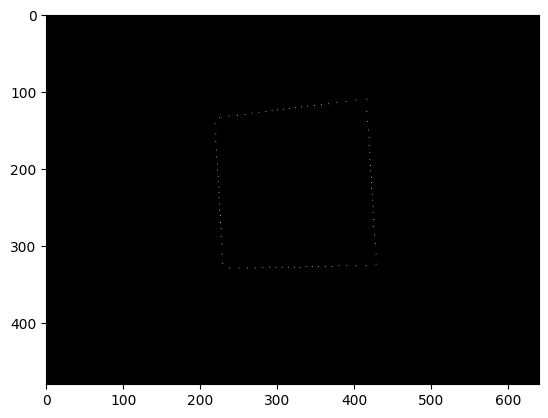

In [17]:
# 然后获取每条直线的斜率（方向）,范围是0到2*pi
k_angle = np.array(range(0, int(200 * (2 * math.pi)), 15)) / 200 - math.pi
# 获取边框上的点，用于之后遍历路径
stripe = np.array(np.where(image_center))
stripe_center = circle_center
# 获取整个图面的中心点
# 所有的点都是以行列的形式标注的，先取行，再取列
image_center[int(stripe_center[0]), int(stripe_center[1])] = 255
# 接下来找出每个有值的点所具有对应三角值
# 找出相对位置
k_re = stripe[0, :] - stripe_center[0], stripe[1, :] - stripe_center[1]
k_re = np.array(k_re)
k_stripe_pi = np.arctan2(k_re[0, :], k_re[1, :])
# 找出所有的斜率对应的最接近的点
# 将找出的边界点存入对应的array矩阵中
road=np.zeros(np.shape(gray))
circle_point=np.ones((np.size(k_angle),2))
for k in range(0, np.size(k_angle)):
    k_rela = np.abs(k_stripe_pi - k_angle[k])
    min_index = np.argmin(k_rela)
    road[int(stripe[0, min_index]), int(stripe[1, min_index])] = 255
    circle_point[k,:]=[int(stripe[0, min_index]), int(stripe[1, min_index])]
point_num=np.shape(circle_point)[0]
square_point=np.zeros(np.shape(circle_point))
square_point[0:int(point_num/8*7),:]=circle_point[(int(point_num)-int(point_num/8*7))-1:point_num-1,:]
square_point[int(point_num/8*7)-1:int(point_num)-1,:]=circle_point[0:int(point_num-int(point_num/8*7)),:]
plt.imshow(road, cmap='gray')

In [20]:
''' 以下是动态工作区-----------------------------------------------------------------------------------'''
# move_to_the_point(dis_aim(要求的最终精度),speed(1~10),aim_center(最终的目标点),sleep_time(暂停的时间))
# 现将点移动至中心点
move_to_the_point(12,3,circle_center,0.1,red_center)
buzzer_open()

6

In [25]:
# 遍历所有的提取出来的点,这里是画正方形
# move_to_the_point(dis_aim(要求的最终精度),speed(1~10),aim_center(最终的目标点),sleep_time(暂停的时间))
for point in range(0, np.size(k_angle)-1):
    point_center=square_point[point,:]
    move_to_the_point(12,3,point_center,0.1,red_center)
buzzer_open()

6

In [1]:
# 计算圆的路径
# 计算原本的正方形边长
side=np.zeros(4)
for i in range(4):
    side[i]=np.linalg.norm(border_point[i,:]-border_point[(i+1)%4,:])
length_side=np.mean(side)/2
length_basic=np.zeros(np.shape(k_angle))

for i in range(np.size(k_angle)):
    angle=k_angle[i]
    if -3/4*math.pi>=angle>=-math.pi:
        length_basic[i]=abs(length_side/np.cos(angle))
    if -1/4*math.pi>angle>=-3/4*math.pi:
        length_basic[i]=abs(length_side/np.sin(angle))
    if 1/4*math.pi>angle>=-1/4*math.pi:
        length_basic[i]=abs(length_side/np.cos(angle))
    if 3/4*math.pi>angle>=1/4*math.pi:
        length_basic[i]=abs(length_side/np.sin(angle))
    if math.pi>=angle>=3/4*math.pi:
        length_basic[i]=abs(length_side/np.cos(angle))

# 这是我们计算出了原本该有的长度
# 接下来我们计算读取的长度
length_true=np.linalg.norm(circle_point-circle_center,axis=1)
length_re=length_true/length_basic
round_R=np.ones(np.shape(k_angle)[0])*length_side*length_re
# 在找到所有的点的距离后，开始将所有的点回到原来的图像中
round_point=np.ones(np.shape(circle_point))
for i in range(np.size(k_angle)):# 分别找到对应角度和长度
    R=round_R[i]
    angle=k_angle[i]
    x=np.cos(angle)*R+circle_center[1]
    y=np.sin(angle)*R+circle_center[0]
    round_point[i,:]=np.array([int(y),int(x)])
    image_center[int(y),int(x)]=255
plt.imshow(image_center, cmap='gray')

NameError: name 'np' is not defined

In [28]:
# 在完成第一题后，先将位置回正circle_center
# move_to_the_point(dis_aim(要求的最终精度),speed(1~10),aim_center(最终的目标点),sleep_time(暂停的时间))
move_to_the_point(12,3,circle_center,0.1,red_center)
buzzer_open()

6

In [ ]:
# 遍历所有的提取出来的点
# 这里是画圆
# move_to_the_point(dis_aim(要求的最终精度),speed(1~10),aim_center(最终的目标点),sleep_time(暂停的时间))
for point in range(0, np.size(k_angle)):
    point_center=round_point[point,:]
    move_to_the_point(12,3,point_center,0.1,red_center)
buzzer_open()